<a href="https://colab.research.google.com/github/AriannaRigamonti/MachineLearning/blob/main/MachineLearning_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D


# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# **PRE-PROCESSING:**


In [ ]:
# Remove extra spaces from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

# remove columns: SpeciesID, Ncodons, SpeciesName, AGA
columns_to_remove = ['SpeciesID', 'Ncodons', 'SpeciesName', 'AGA']
train = train_df.drop(columns_to_remove, axis = 1)
columns_to_remove2 = ['SpeciesID', 'Ncodons', 'SpeciesName']
test = test_df.drop(columns=columns_to_remove2)

# check if there are na values
nan_values = train.isna().sum().sum()
nan_values # no na values.

0

In [ ]:
def onehot_feature(pd_data, column_name):
    # Use pandas get_dummies to perform one-hot encoding
    one_hot_encoded = pd.get_dummies(pd_data[column_name], prefix=column_name)

    # Drop the original column
    pd_data = pd_data.drop(column_name, axis=1)

    # Concatenate the one-hot encoded columns to the original DataFrame
    pd_data = pd.concat([pd_data, one_hot_encoded], axis=1)

    return pd_data

# **PRELIMINARY DATA ANALYSIS**

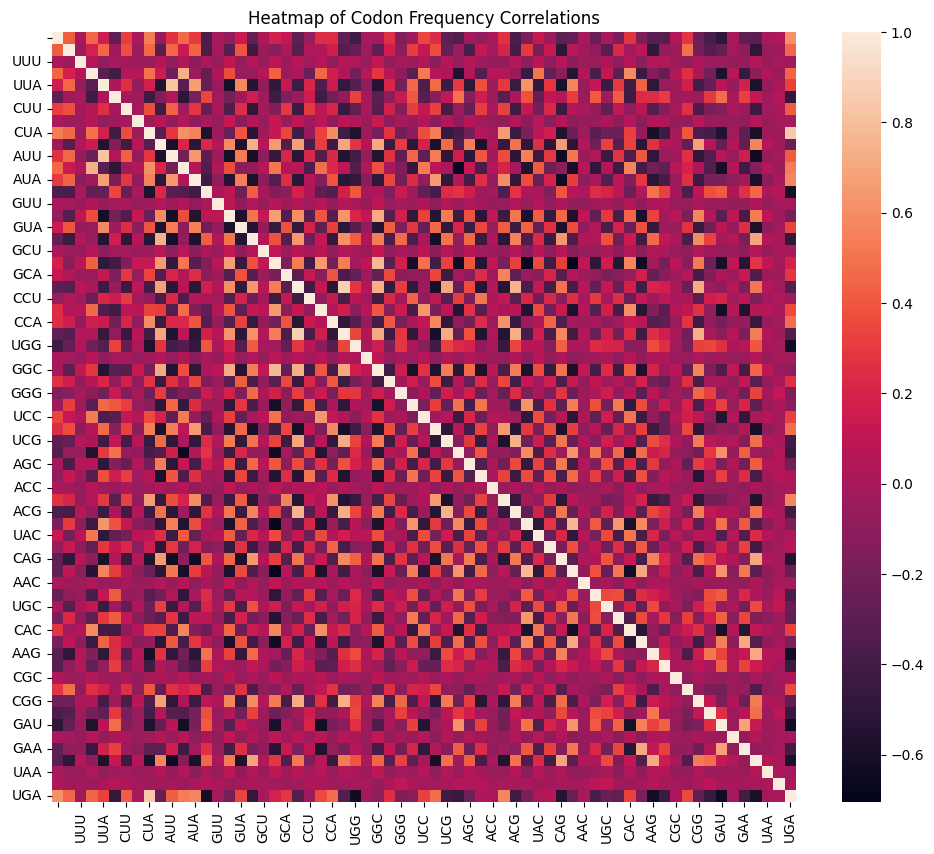

In [ ]:
# Select only numeric columns for correlation matrix
numeric_features = train.select_dtypes(include=[float, int]).columns

# Correlation Matrix
corr_matrix = train[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix)
plt.title('Heatmap of Codon Frequency Correlations')
plt.show()

In [ ]:
# subset correlation matrix keeping only values > 0.7 and < -0.4
corr_matrix.head()
corr_max = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.4)]
corr_max["count"] = corr_max.count(axis = 1)
corr_max2 = corr_max[corr_max["count"] > 1]
corr_max3 = corr_max2.drop(corr_max2.columns[~corr_max2.columns.isin(corr_max2.index)], axis = 1)

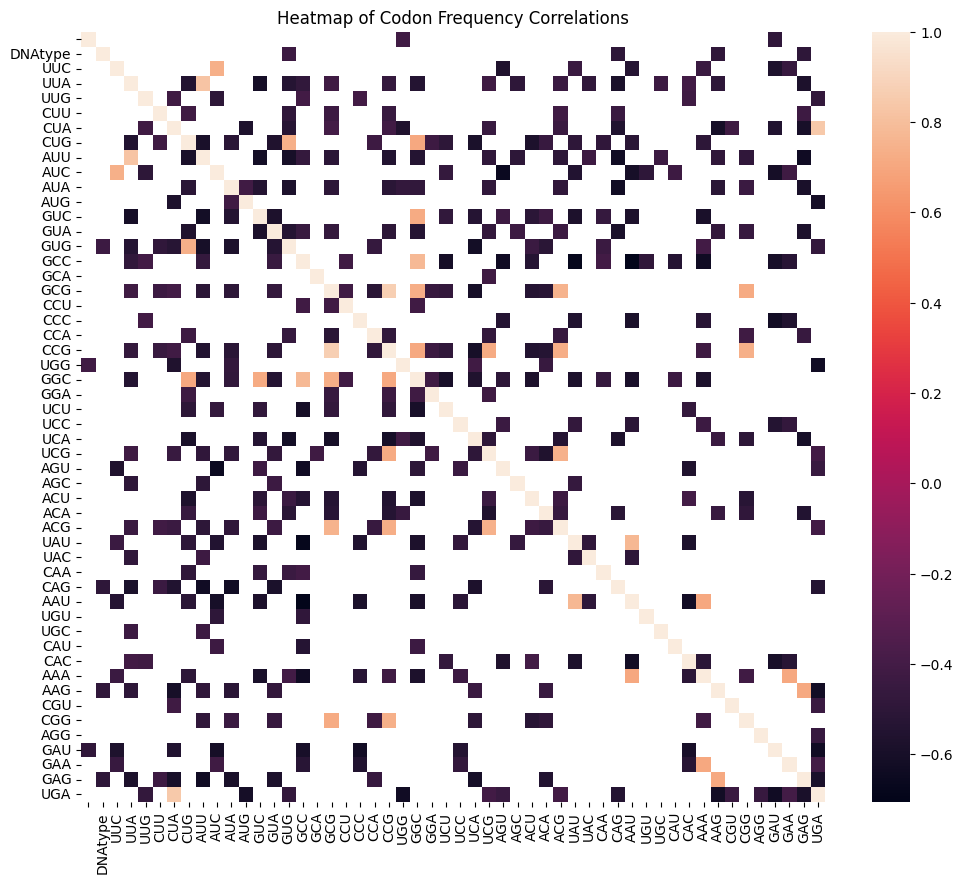

In [ ]:
# Correlation Matrix on corr_max3
plt.figure(figsize=(12, 10))
sns.heatmap(corr_max3)
plt.title('Heatmap of Codon Frequency Correlations')
plt.show()

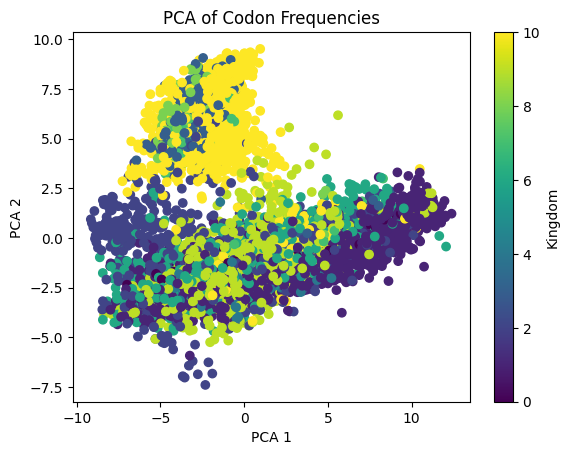

In [ ]:
# Convert categorical values in "Kingdom" to numerical representations
train['Kingdom_code'] = pd.Categorical(train['Kingdom']).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train.iloc[:, 3:])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualization of PCA results with color based on the numerical representation of "Kingdom"
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train['Kingdom_code'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Codon Frequencies')
plt.colorbar(label='Kingdom')
plt.show()

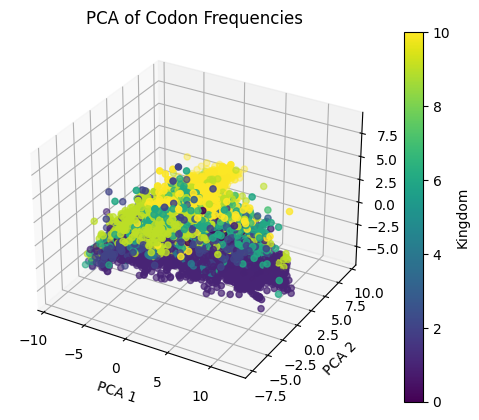

In [ ]:
# Convert categorical values in "Kingdom" to numerical representations
train['Kingdom_code'] = pd.Categorical(train['Kingdom']).codes

# Visualization of PCA results in 3D with color based on the numerical representation of "Kingdom"
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=train['Kingdom_code'], cmap='viridis')

# Adding labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of Codon Frequencies')

# Adding colorbar
plt.colorbar(scatter, ax=ax, label='Kingdom')

plt.show()

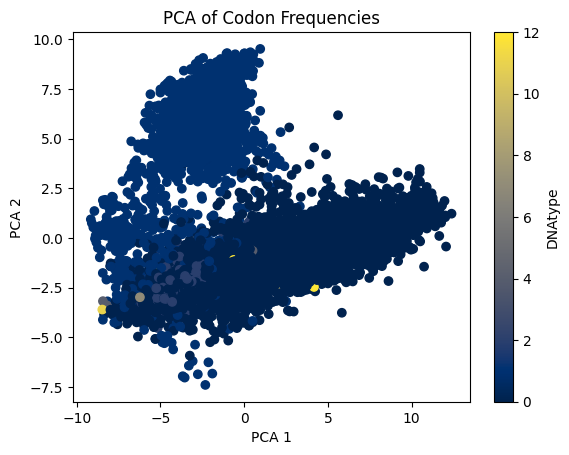

In [ ]:
# Convert categorical values in "Kingdom" to numerical representations
#train['Kingdom_code'] = pd.Categorical(train['Kingdom']).codes

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train.iloc[:, 3:])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Visualization of PCA results with color based on the numerical representation of "Kingdom"
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train['DNAtype'], cmap='cividis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Codon Frequencies')
plt.colorbar(label='DNAtype')
plt.show()

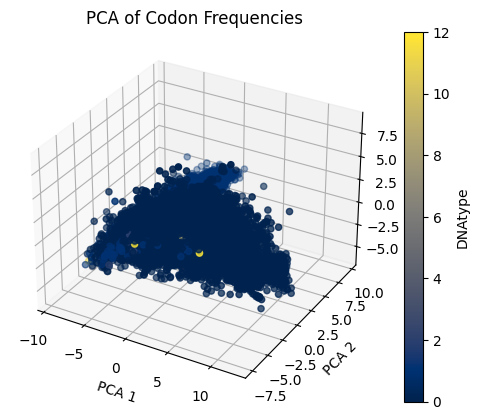

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train.iloc[:, 3:])

# Apply PCA
pca = PCA(n_components=3)  # Change to 3 components for 3D visualization
pca_result = pca.fit_transform(scaled_features)

# Visualization of PCA results in 3D with color based on the "DNAtype" variable using the 'cividis' colormap
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=train['DNAtype'], cmap='cividis')

# Adding labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('PCA of Codon Frequencies')

# Adding colorbar
plt.colorbar(scatter, ax=ax, label='DNAtype')

plt.show()

In [ ]:
# Clustering

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train.iloc[:, 3:])

# Clustering with KMeans
kmeans = KMeans(n_clusters=11)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Print Silhouette Score
print(f'Silhouette Score for KMeans: {silhouette_score(scaled_features, kmeans_labels)}')

# The Silhouette Score we obtained for the KMeans clustering on the scaled features of the "train" dataset is approximately 0.0797.
# A Silhouette Score ranges from -1 to 1, where a score closer to 1 indicates better-defined clusters. In our case, a score of 0.0797 suggests that the clusters are somewhat separated but not very well-defined.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for KMeans: 0.07969001754771482


In [ ]:
# Classification
X = train_df.iloc[:, 3:]
y = train_df['Kingdom']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_val)
print(classification_report(y_val, y_pred))

In [ ]:
# Feature Selection using Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
model = SelectFromModel(lasso, prefit=True)
X_train_selected = model.transform(X_train)
X_val_selected = model.transform(X_val)

In [ ]:
# Train and Evaluate Classifier on Selected Features
rf_clf.fit(X_train_selected, y_train)
y_pred_selected = rf_clf.predict(X_val_selected)
print(classification_report(y_val, y_pred_selected))

In [ ]:
# Regression for AGA codon
X_train_reg = train_df.iloc[:, 3:].drop('AGA', axis=1)
y_train_reg = train_df['AGA']
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_reg, y_train_reg)

In [ ]:
# Predicting missing AGA values
X_test = test_df.iloc[:, 2:]
aga_pred = rf_reg.predict(X_test)
test_df['AGA'] = aga_pred

In [ ]:
# Re-training the classification model with predicted AGA values
X_test_full = test_df.iloc[:, 2:]
final_predictions = rf_clf.predict(X_test_full)

In [ ]:
# Save predictions
test_df['Predicted_Kingdom'] = final_predictions
test_df.to_csv('final_predictions.csv', index=False)